In [3]:
import numpy as np
from pathlib import Path
import pandas as pd
import squarify
import ipywidgets as wg
from matplotlib import pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
import warnings
import statsmodels.api as sm
from PIL import ImageTk, Image
import PIL.Image
from tkinter import *
import squarify
import matplotlib

## Data Cleaning

In [41]:
#To read the csv file
df1 = pd.read_csv("FinalDATASET.csv")
df1
#To display the first five observations
df1.head()

,FIPS Code,Name,Value of Stroke Hospitalization,Range (Stroke Hospitalization),Value of Stroke Mortality,Range (Stroke Mortalization),Value of Afib Hospitalization,Range (Afib Hospitalization),Value of Hypertension,Range (HTN Hospitalization),...,Total Population,Urban-Rural Status,Blood Pressure Medication,Cholesterol-Lowering Medication,Hospitals (#),Hospitals with Listed Services (#) - Emergency Department,Hospitals with Listed Services (#) - Neurological Services,Neurologists,Neurosurgeons,Health Insurance Status (%)
0,36001,"""Albany, (NY)""",12.5,12.4 - 13.7 (12),199.2,197.0 - 210.1 (14),6.8,6.8 - 8.0 (628),525.4,90.1 - 543.0 (644),...,306968,3,16.6,12.7,4,4,3,5.9,11.8,4.2
1,36003,"""Allegany, (NY)""",10.5,9.4 - 11.1 (626),216.6,210.2 - 219.7 (11),6.6,5.6 - 6.7 (617),647.2,543.1 - 692.0 (644),...,46688,4,18.1,14.2,2,1,0,-1.0,-1.0,5.7
2,36005,"""Bronx, (NY)""",11.9,11.7 - 11.9 (10),157.5,110.2 - 178.4 (13),4.8,4.1 - 5.5 (664),1348.7,1067.9 - 3360.2 (643,...,1435068,1,25.9,22.4,7,7,7,19.6,62.3,8.7
3,36007,"""Broome, (NY)""",11.4,11.2 - 12.5 (637),190.2,178.5 - 196.9 (12),7.3,6.8 - 8.0 (628),778.9,692.1 - 839.0 (642),...,193188,3,16.8,12.1,2,2,2,38.3,38.3,5.2
4,36009,"""Cattaraugus, (NY)""",11.9,11.2 - 12.5 (637),234.5,219.8 - 273.8 (12),5.9,5.6 - 6.7 (617),814.3,692.1 - 839.0 (642),...,77121,4,17.8,14.5,1,1,1,76.8,-1.0,6.5


In [42]:
#this provides univariate analysis on the dataset such as measure of central tendency, Standard Deviation e.t.c.
df1.describe()

,FIPS Code,Value of Stroke Hospitalization,Value of Stroke Mortality,Value of Afib Hospitalization,Value of Hypertension,High Cholesterol Awareness,Diabetes Percentage,Obesity Percentage,Physical Inactivity Percentage,Current Smoker Status,...,Total Population,Urban-Rural Status,Blood Pressure Medication,Cholesterol-Lowering Medication,Hospitals (#),Hospitals with Listed Services (#) - Emergency Department,Hospitals with Listed Services (#) - Neurological Services,Neurologists,Neurosurgeons,Health Insurance Status (%)
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,36062.000000,11.496774,198.962903,6.112903,722.675806,34.903226,9.567742,31.429032,23.598387,19.022581,...,3.156826e+05,2.951613,18.375806,14.298387,2.612903,2.064516,1.645161,25.274194,35.751613,5.322581
std,36.083237,1.132380,31.357213,1.247093,185.328240,2.218992,1.709642,5.024053,3.613249,3.127688,...,5.461976e+05,1.031113,2.381671,2.479919,2.824685,2.495051,2.535627,33.180287,59.496915,1.112436
min,36001.000000,8.600000,110.200000,3.900000,414.000000,27.700000,5.600000,15.700000,14.700000,11.500000,...,4.515000e+03,1.000000,15.500000,11.300000,0.000000,0.000000,0.000000,-1.000000,-1.000000,4.100000
25%,36031.500000,10.825000,183.700000,5.250000,600.650000,33.550000,8.375000,28.650000,20.800000,17.000000,...,4.959575e+04,2.000000,16.925000,12.800000,1.000000,1.000000,0.000000,-1.000000,-1.000000,4.625000
50%,36062.000000,11.700000,205.750000,5.900000,730.100000,34.900000,9.650000,31.450000,24.250000,19.700000,...,8.770700e+04,3.000000,17.700000,13.450000,1.500000,1.000000,1.000000,14.900000,-1.000000,5.100000
75%,36092.500000,12.075000,216.975000,6.900000,813.800000,36.575000,10.975000,35.525000,26.225000,21.500000,...,2.295948e+05,4.000000,18.675000,14.875000,3.000000,2.000000,2.000000,36.975000,53.275000,5.575000
max,36123.000000,13.700000,273.800000,10.400000,1348.700000,41.400000,13.500000,39.600000,31.000000,23.600000,...,2.589974e+06,4.000000,27.400000,22.700000,12.000000,10.000000,10.000000,127.900000,230.200000,10.100000


In [43]:
#To narrow down the number of dimensions to what's needed for this project and assign the resulting file another variable name.
df2 = df1 [['Name','Value of Stroke Hospitalization','Value of Stroke Mortality', 'Value of Afib Hospitalization','Value of Hypertension', 'High Cholesterol Awareness', 'Diabetes Percentage','Obesity Percentage', 'Physical Inactivity Percentage', 'Current Smoker Status', 'Total Population', 'Poverty (%)', 'Health Insurance Status (%)', 'Cholesterol-Lowering Medication ', 'Blood Pressure Medication', 'Black (%)', 'American Indian/Alaska Native (%)', 'Asian/Native Hawaiian/Other Pacific Islander (%)', 'Caucasian', 'Hispanic/Latino (%)', 'Hospitals (#)', 'Hospitals with Listed Services (#) - Neurological Services', 'Hospitals with Listed Services (#) - Emergency Department', 'Neurologists', 'Neurosurgeons', 'Urban-Rural Status', 'Aged 65 and Older (%)']]
df2

,Name,Value of Stroke Hospitalization,Value of Stroke Mortality,Value of Afib Hospitalization,Value of Hypertension,High Cholesterol Awareness,Diabetes Percentage,Obesity Percentage,Physical Inactivity Percentage,Current Smoker Status,...,Asian/Native Hawaiian/Other Pacific Islander (%),Caucasian,Hispanic/Latino (%),Hospitals (#),Hospitals with Listed Services (#) - Neurological Services,Hospitals with Listed Services (#) - Emergency Department,Neurologists,Neurosurgeons,Urban-Rural Status,Aged 65 and Older (%)
0,"""Albany, (NY)""",12.5,199.2,6.8,525.4,31.6,8.8,27.4,19.2,15.5,...,6.5,72.1,5.9,4,3,4,5.9,11.8,3,16.5
1,"""Allegany, (NY)""",10.5,216.6,6.6,647.2,35.1,9.3,36.6,26.3,20.3,...,1.2,94.4,1.6,2,0,1,-1.0,-1.0,4,18.4
2,"""Bronx, (NY)""",11.9,157.5,4.8,1348.7,33.7,12.4,28.4,29.8,18.1,...,3.6,9.1,56.0,7,7,7,19.6,62.3,1,12.5
3,"""Broome, (NY)""",11.4,190.2,7.3,778.9,34.7,8.9,30.2,21.7,20.0,...,4.3,83.3,4.2,2,2,2,38.3,38.3,3,18.7
4,"""Cattaraugus, (NY)""",11.9,234.5,5.9,814.3,38.0,11.8,38.7,26.6,22.3,...,0.7,90.5,2.1,1,1,1,76.8,-1.0,4,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"""Washington, (NY)""",10.9,217.0,4.6,754.1,36.9,11.7,35.6,24.7,23.4,...,0.6,92.3,2.7,0,0,0,-1.0,-1.0,3,18.9
58,"""Wayne, (NY)""",12.3,219.0,7.0,439.1,37.1,11.0,37.4,29.3,21.7,...,0.9,89.9,4.4,1,0,1,30.0,-1.0,2,18.4
59,"""Westchester, (NY)""",9.0,159.1,4.9,508.3,34.0,6.7,21.2,18.8,12.1,...,5.9,53.4,24.6,9,8,8,7.3,24.2,2,16.7
60,"""Wyoming, (NY)""",11.1,230.6,6.4,735.0,35.5,10.0,37.6,25.4,22.2,...,0.4,89.9,3.2,1,0,0,-1.0,-1.0,4,17.4


In [44]:

#Since some columns are percentages, in order to get the best results, we need to convert them back to values.
df3 = df2.copy()
df3['ObesityValuez'] = df3['Obesity Percentage'] * df3['Total Population']
df3['DiabetesValuez'] = df3['Diabetes Percentage'] * df3['Total Population']
df3['PhysicalInactivityValuez'] = df3['Physical Inactivity Percentage'] * df3['Total Population']
df3['PovertyValuez'] = df3['Poverty (%)'] * df3['Total Population']
df3['HIStatus'] = df3['Health Insurance Status (%)'] * df3['Total Population']

column=[col for col in df3.columns if col.endswith('Valuez') or col.startswith('HI')]
for column0 in column:
    for indices, row in df3.iterrows():
        df3.at[indices, column0] = row[column0] /100

df3


,Name,Value of Stroke Hospitalization,Value of Stroke Mortality,Value of Afib Hospitalization,Value of Hypertension,High Cholesterol Awareness,Diabetes Percentage,Obesity Percentage,Physical Inactivity Percentage,Current Smoker Status,...,Hospitals with Listed Services (#) - Emergency Department,Neurologists,Neurosurgeons,Urban-Rural Status,Aged 65 and Older (%),ObesityValuez,DiabetesValuez,PhysicalInactivityValuez,PovertyValuez,HIStatus
0,"""Albany, (NY)""",12.5,199.2,6.8,525.4,31.6,8.8,27.4,19.2,15.5,...,4,5.9,11.8,3,16.5,84109.232,27013.184,58937.856,35915.256,12892.656
1,"""Allegany, (NY)""",10.5,216.6,6.6,647.2,35.1,9.3,36.6,26.3,20.3,...,1,-1.0,-1.0,4,18.4,17087.808,4341.984,12278.944,8357.152,2661.216
2,"""Bronx, (NY)""",11.9,157.5,4.8,1348.7,33.7,12.4,28.4,29.8,18.1,...,7,19.6,62.3,1,12.5,407559.312,177948.432,427650.264,375987.816,124850.916
3,"""Broome, (NY)""",11.4,190.2,7.3,778.9,34.7,8.9,30.2,21.7,20.0,...,2,38.3,38.3,3,18.7,58342.776,17193.732,41921.796,34387.464,10045.776
4,"""Cattaraugus, (NY)""",11.9,234.5,5.9,814.3,38.0,11.8,38.7,26.6,22.3,...,1,76.8,-1.0,4,18.7,29845.827,9100.278,20514.186,11336.787,5012.865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"""Washington, (NY)""",10.9,217.0,4.6,754.1,36.9,11.7,35.6,24.7,23.4,...,0,-1.0,-1.0,3,18.9,21935.296,7209.072,15219.152,7332.304,3327.264
58,"""Wayne, (NY)""",12.3,219.0,7.0,439.1,37.1,11.0,37.4,29.3,21.7,...,1,30.0,-1.0,2,18.4,33854.106,9957.090,26522.067,10319.166,4344.912
59,"""Westchester, (NY)""",9.0,159.1,4.9,508.3,34.0,6.7,21.2,18.8,12.1,...,8,7.3,24.2,2,16.7,205404.680,64915.630,182151.320,81386.760,56195.620
60,"""Wyoming, (NY)""",11.1,230.6,6.4,735.0,35.5,10.0,37.6,25.4,22.2,...,0,-1.0,-1.0,4,17.4,15154.680,4030.500,10237.470,3990.195,1854.030


In [45]:
#renaming our columns by eliminating white spaces to allow proper programming formats.
df3.columns = ['Name','Value_of_Stroke_Hospitalization','Value_of_Stroke_Mortality','Value_of_Afib_Hospitalization','Value_of_Hypertension','High_Cholesterol_Awareness','Diabetes_Percentage','Obesity_Percentage','Physical_Inactivity_Percentage','Current_Smoker_Status','Total_Population','Poverty_(%)','Health_Insurance_Status_(%)','Obesity_Value','Diabetes_Value','Physical_Inactivity_Value','Poverty_Value','Health_Insurance_Status', 'Cholesterol-Lowering Medication ', 'Blood Pressure Medication', 'Black (%)', 'American Indian/Alaska Native (%)', 'Asian/Native Hawaiian/Other Pacific Islander (%)', 'Caucasian', 'Hispanic/Latino (%)', 'Hospitals (#)', 'Hospitals with Listed Services (#) - Neurological Services', 'Hospitals with Listed Services (#) - Emergency Department', 'Neurologists', 'Neurosurgeons', 'Urban-Rural Status', 'Aged 65 and Older (%)']
df3

,Name,Value_of_Stroke_Hospitalization,Value_of_Stroke_Mortality,Value_of_Afib_Hospitalization,Value_of_Hypertension,High_Cholesterol_Awareness,Diabetes_Percentage,Obesity_Percentage,Physical_Inactivity_Percentage,Current_Smoker_Status,...,Asian/Native Hawaiian/Other Pacific Islander (%),Caucasian,Hispanic/Latino (%),Hospitals (#),Hospitals with Listed Services (#) - Neurological Services,Hospitals with Listed Services (#) - Emergency Department,Neurologists,Neurosurgeons,Urban-Rural Status,Aged 65 and Older (%)
0,"""Albany, (NY)""",12.5,199.2,6.8,525.4,31.6,8.8,27.4,19.2,15.5,...,4,5.9,11.8,3,16.5,84109.232,27013.184,58937.856,35915.256,12892.656
1,"""Allegany, (NY)""",10.5,216.6,6.6,647.2,35.1,9.3,36.6,26.3,20.3,...,1,-1.0,-1.0,4,18.4,17087.808,4341.984,12278.944,8357.152,2661.216
2,"""Bronx, (NY)""",11.9,157.5,4.8,1348.7,33.7,12.4,28.4,29.8,18.1,...,7,19.6,62.3,1,12.5,407559.312,177948.432,427650.264,375987.816,124850.916
3,"""Broome, (NY)""",11.4,190.2,7.3,778.9,34.7,8.9,30.2,21.7,20.0,...,2,38.3,38.3,3,18.7,58342.776,17193.732,41921.796,34387.464,10045.776
4,"""Cattaraugus, (NY)""",11.9,234.5,5.9,814.3,38.0,11.8,38.7,26.6,22.3,...,1,76.8,-1.0,4,18.7,29845.827,9100.278,20514.186,11336.787,5012.865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"""Washington, (NY)""",10.9,217.0,4.6,754.1,36.9,11.7,35.6,24.7,23.4,...,0,-1.0,-1.0,3,18.9,21935.296,7209.072,15219.152,7332.304,3327.264
58,"""Wayne, (NY)""",12.3,219.0,7.0,439.1,37.1,11.0,37.4,29.3,21.7,...,1,30.0,-1.0,2,18.4,33854.106,9957.090,26522.067,10319.166,4344.912
59,"""Westchester, (NY)""",9.0,159.1,4.9,508.3,34.0,6.7,21.2,18.8,12.1,...,8,7.3,24.2,2,16.7,205404.680,64915.630,182151.320,81386.760,56195.620
60,"""Wyoming, (NY)""",11.1,230.6,6.4,735.0,35.5,10.0,37.6,25.4,22.2,...,0,-1.0,-1.0,4,17.4,15154.680,4030.500,10237.470,3990.195,1854.030


In [46]:
#Saving our cleaned dataset
df=df3.copy()
df.to_csv('CleanedDataset.csv')

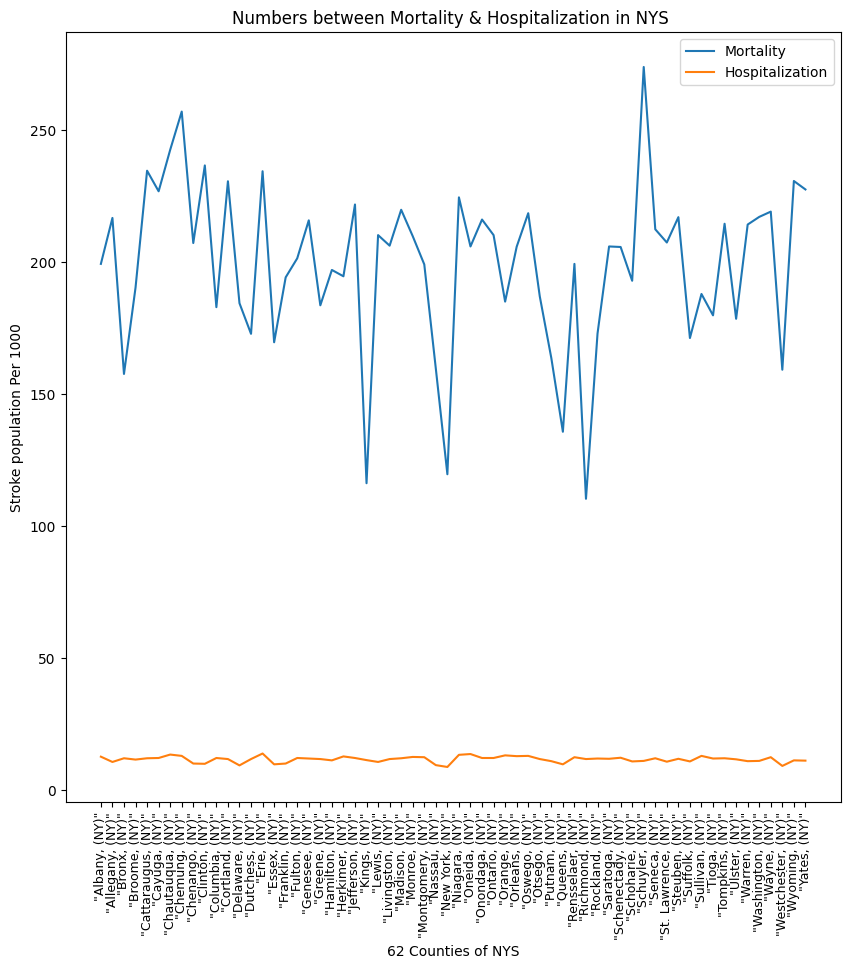

In [47]:
#Line graph showing relationship between Stroke hospitalization and Mortality in New York.

x = df ['Value_of_Stroke_Mortality']
y = df ['Value_of_Stroke_Hospitalization']
z= df ['Name']
plt.figure(figsize=(10,10))
plt.xticks(rotation = 'vertical', fontsize = 9)
plt.plot(z,x)
plt.plot(z,y)
plt.title("Numbers between Mortality & Hospitalization in NYS ")
plt.xlabel('62 Counties of NYS')
plt.ylabel('Stroke population Per 1000')
plt.legend(["Mortality", 'Hospitalization'])
plt.savefig('Stroke M vs H.png')
plt.show()

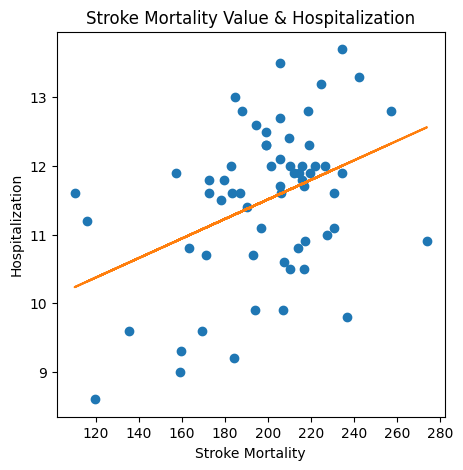

In [48]:
#ScatterPlot displaying the relationship between Stroke Mortality and Hospitalization;
#A linear function was used to generate a straight line
#The straight line can be used to predict both variables.
g = df ['Value_of_Stroke_Mortality']
h = df ['Value_of_Stroke_Hospitalization']
x= np.array(g)
y= np.array(h)

plt.figure(figsize=(5,5))

plt.plot(x, y, 'o')
m2, c2 = np.polyfit(x, y, 1)
plt.plot(x, m2*x + c2)
plt.title('Stroke Mortality Value & Hospitalization')
plt.xlabel('Stroke Mortality')
plt.ylabel('Hospitalization')
plt.savefig('Stroke M vs H 2.png')
plt.show()

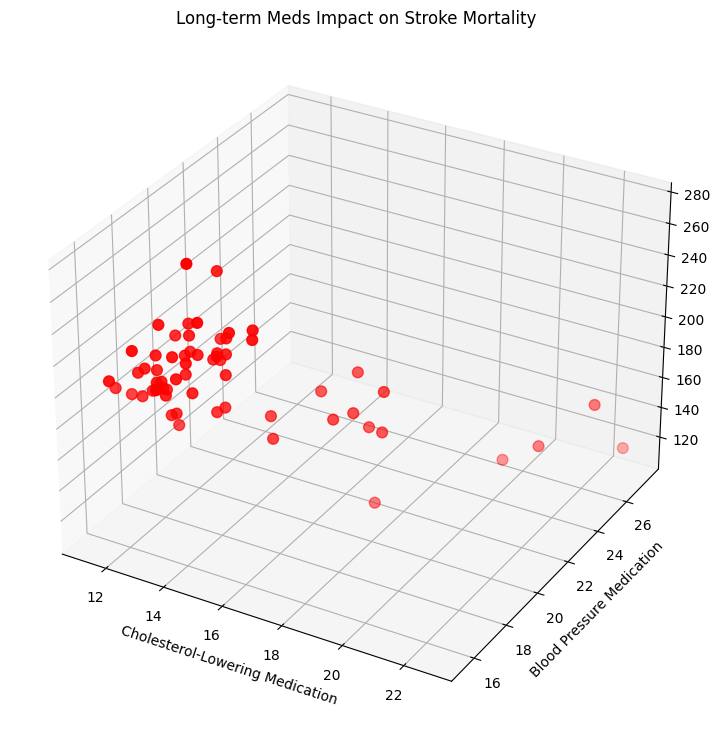

In [49]:
#3D representation of the relationship between Cholesterol-Lowering Medication, Blood Pressure Medication and Stroke mortality counts
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['Cholesterol-Lowering Medication '], df1['Blood Pressure Medication'], df['Value_of_Stroke_Mortality'], c='red', s=60)
plt.title('Long-term Meds Impact on Stroke Mortality')
plt.xlabel('Cholesterol-Lowering Medication')
plt.ylabel('Blood Pressure Medication')
plt.savefig('Stroke M Changed by Drugs 3.png')
plt.show()

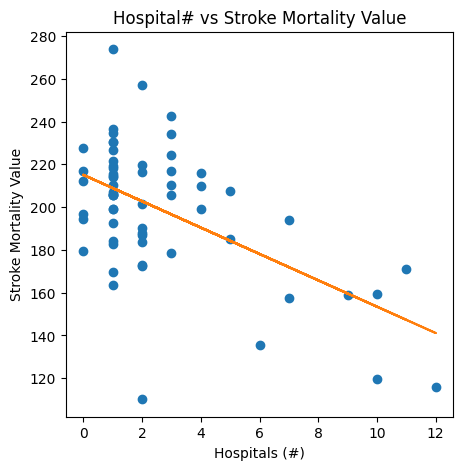

In [50]:
#The Best Fit Line tells us the relationship between count of hospitals and stroke mortality values.
#There is an inverse relationship.
g = df1 ['Hospitals (#)']
h = df1 ['Value of Stroke Mortality']
x= np.array(g)
y= np.array(h)

plt.figure(figsize=(5,5))

plt.plot(x, y, 'o')
m7, c7 = np.polyfit(x, y, 1)

plt.plot(x, m7*x + c7)
plt.title('Hospital# vs Stroke Mortality Value')
plt.xlabel('Hospitals (#)')
plt.ylabel('Stroke Mortality Value')
plt.savefig('Stroke M vs H# 4.png')
plt.show()

In [51]:
hospital_hist = pd.DataFrame(df1, columns = ['Hospitals with Listed Services (#) - Neurological Services'])
hospital_hist 

,Hospitals with Listed Services (#) - Neurological Services
0,3
1,0
2,7
3,2
4,1
...,...
57,0
58,0
59,8
60,0


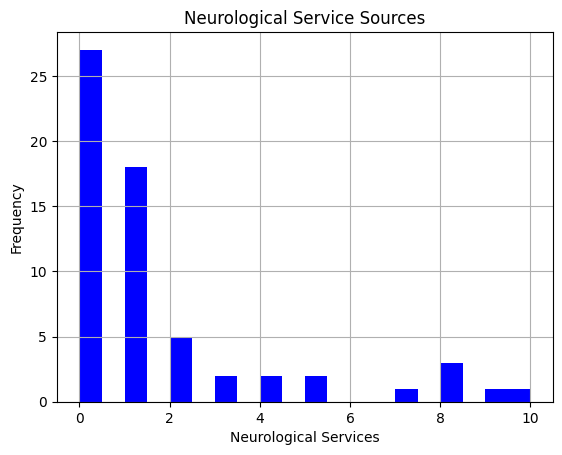

In [52]:
#Bar chart showing the relationship between frequency and counts of Neurological services.
hospital_hist.hist(bins = 20, color='blue')
plt.title('Neurological Service Sources')
plt.ylabel('Frequency')
plt.xlabel('Neurological Services')
plt.savefig('Neurological Services 5.png')
plt.show()

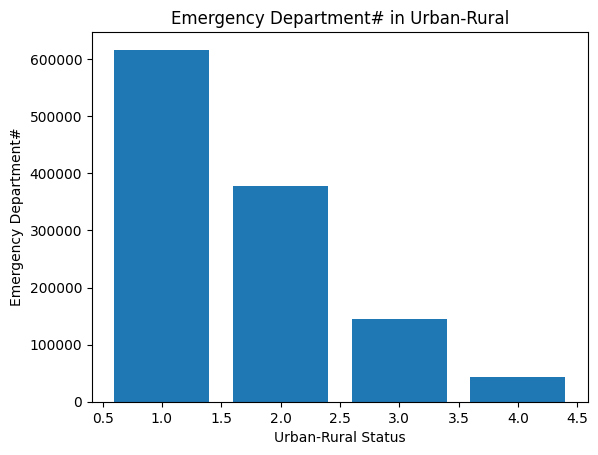

In [53]:
#Bar chart showing the relationship between the counts of emergency departments and Urban-Rural status
plt.bar(x= df1 ['Urban-Rural Status'],
        height = df ['Hospitals with Listed Services (#) - Emergency Department'])
plt.title('Emergency Department# in Urban-Rural')
plt.xlabel('Urban-Rural Status')
plt.ylabel('Emergency Department#')
plt.savefig('ER in Urban-Rural 6.png')
plt.show ()

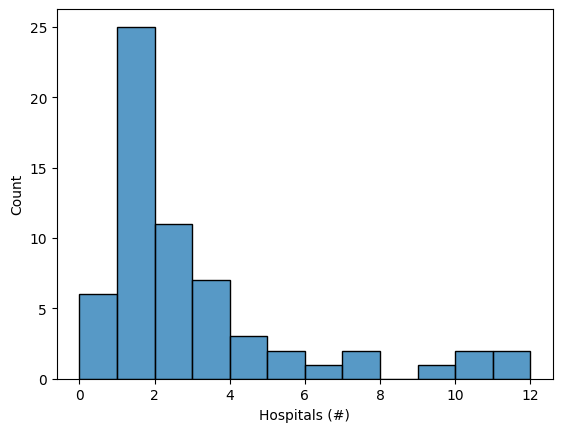

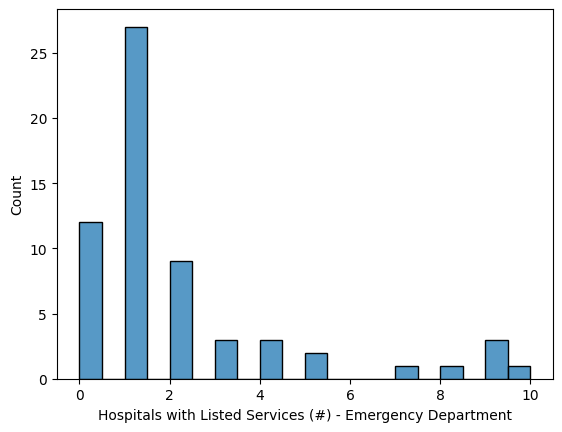

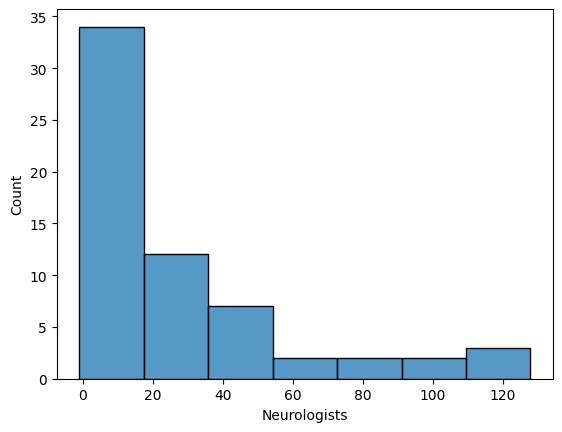

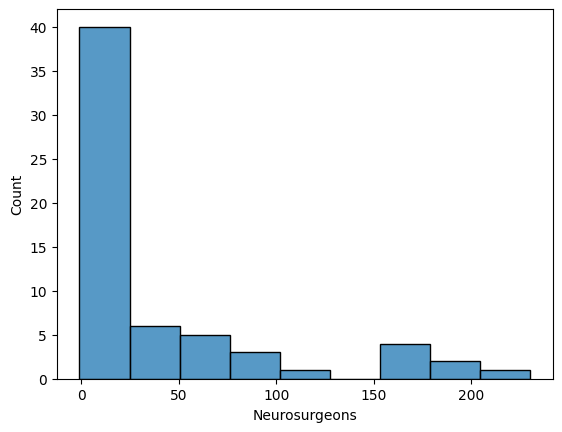

In [54]:
#Bar charts showing the frequency of hospital counts, Hospitals with Listed Services counts, Neurologist count, and Neurosurgeon count per county.
#Shows that 1 hospital count is frequent among New York Counties; in other words, most counties(25) have 1 hospital. 
#25+ counties have only 1 Emergency department in New York.
#Approximately 35 counties have 20 or lesser Neurologists.
#Approximately 40 counties have below 25 or lesser Neurologists.

total_records= len(df1)
columns = ["Hospitals (#)", "Hospitals with Listed Services (#) - Emergency Department", "Neurologists", "Neurosurgeons"] # a list
for i in columns:

    ax1 = sns.histplot(df1[i])
    plt.show()


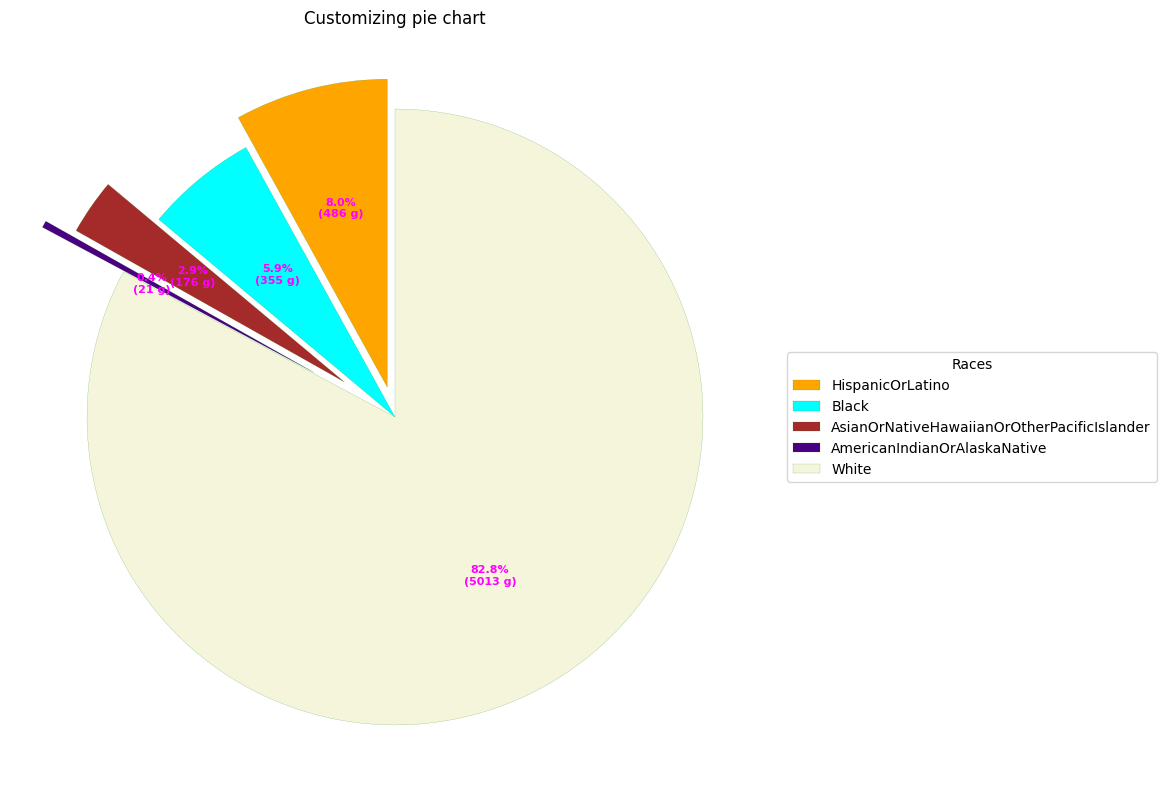

In [55]:
#Racial Distribution of Stroke patients
#White leads with 82%
#AmericanIndians/Alaska Natives have the least with 0.4%
#This is not prevalence, but absolute numbers represented.

from matplotlib import pyplot as plt

White = df1["Caucasian"].sum()
Black = df1["Black (%)"].sum()
AsianOrNativeHawaiianOrOtherPacificIslander = df1["Asian/Native Hawaiian/Other Pacific Islander (%)"].sum()
AmericanIndianOrAlaskaNative =df1["American Indian/Alaska Native (%)"].sum()
HispanicOrLatino = df1["Hispanic/Latino (%)"].sum()
#print (AmericanIndianOrAlaskaNative)

explode = (0.1, 0.0, 0.2, 0.3, 0.0)
 
data = [HispanicOrLatino, Black, AsianOrNativeHawaiianOrOtherPacificIslander, AmericanIndianOrAlaskaNative, White]
 
race = ['HispanicOrLatino', 'Black', 'AsianOrNativeHawaiianOrOtherPacificIslander', 'AmericanIndianOrAlaskaNative', 'White']
# Creating color parameters
colors = ( "orange", "cyan", "brown", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : .1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 10))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, race,
          title ="Races",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

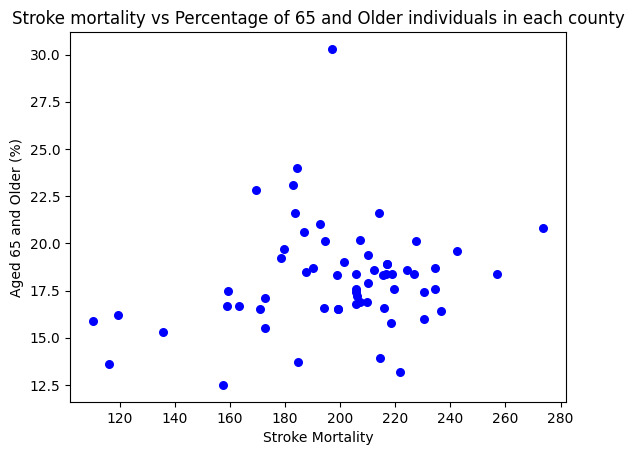

In [56]:
#Relationship showing distribution of 65 years and older  mortality population per county.
#Counties with higher number of individuals aged 65 and above tend to have higher stroke mortality.

x = df1 ["Value of Stroke Mortality"]
y = df1 ["Aged 65 and Older (%)"]
plt.title("Stroke mortality vs Percentage of 65 and Older individuals in each county")
plt.xlabel("Stroke Mortality")
plt.ylabel("Aged 65 and Older (%)")
plt.scatter(x , y, s=30, c="b", alpha=1)
plt.show()

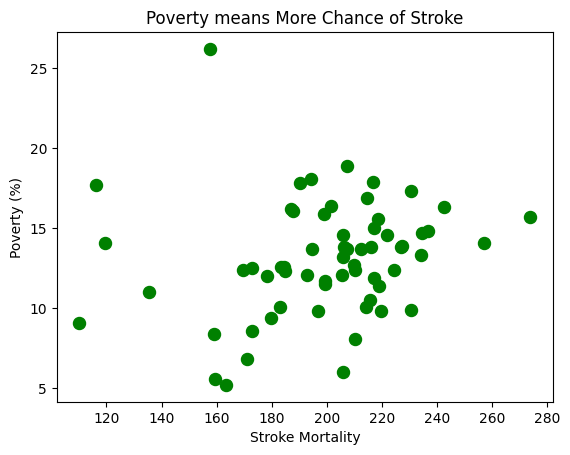

In [57]:
#Relationship between poverty and Stroke mortality
#Poverty is correlated to Stroke mortality.
#Poverty increases with stroke mortality counts.
x = df1 ["Value of Stroke Mortality"]
y = df1 ["Poverty (%)"]
plt.title("Poverty means More Chance of Stroke")
plt.xlabel("Stroke Mortality")
plt.ylabel("Poverty (%)")
plt.scatter(x , y, s=75, c="g", alpha=1)
plt.show()

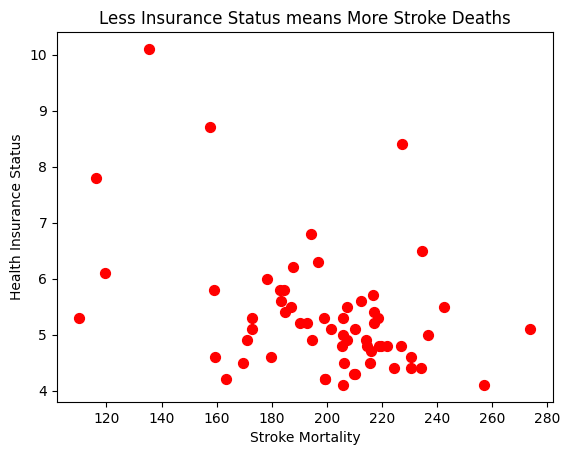

In [58]:
#Relationship between Insurance Status and Stroke mortality
#Insurance status is correlated to Stroke mortality.
#Counties with higher number of individuals with insurance tend to have low stroke mortality counts.
x = df1 ["Value of Stroke Mortality"]
y = df1 ["Health Insurance Status (%)"]
plt.title("Less Insurance Status means More Stroke Deaths")
plt.xlabel("Stroke Mortality")
plt.ylabel("Health Insurance Status")
plt.scatter(x , y, s=50, c="r", alpha=1)
plt.show()

In [59]:
#Prevalence of Stroke mortality per race in each county.
dfRace = pd.DataFrame(df1, columns=["Name", "American Indian/Alaska Native (%)","Black (%)", "Asian/Native Hawaiian/Other Pacific Islander (%)","Hispanic/Latino (%)"])
dfRace

,Name,American Indian/Alaska Native (%),Black (%),Asian/Native Hawaiian/Other Pacific Islander (%),Hispanic/Latino (%)
0,"""Albany, (NY)""",0.0,11.5,6.5,5.9
1,"""Allegany, (NY)""",0.2,1.4,1.2,1.6
2,"""Bronx, (NY)""",0.2,29.2,3.6,56.0
3,"""Broome, (NY)""",0.1,5.1,4.3,4.2
4,"""Cattaraugus, (NY)""",3.1,1.4,0.7,2.1
...,...,...,...,...,...
57,"""Washington, (NY)""",0.3,2.7,0.6,2.7
58,"""Wayne, (NY)""",0.1,2.7,0.9,4.4
59,"""Westchester, (NY)""",0.1,13.4,5.9,24.6
60,"""Wyoming, (NY)""",0.4,3.9,0.4,3.2


In [60]:
dfRace.info

<bound method DataFrame.info of                    Name  American Indian/Alaska Native (%)  Black (%)   
0        "Albany, (NY)"                                0.0       11.5  \
1      "Allegany, (NY)"                                0.2        1.4   
2         "Bronx, (NY)"                                0.2       29.2   
3        "Broome, (NY)"                                0.1        5.1   
4   "Cattaraugus, (NY)"                                3.1        1.4   
..                  ...                                ...        ...   
57   "Washington, (NY)"                                0.3        2.7   
58        "Wayne, (NY)"                                0.1        2.7   
59  "Westchester, (NY)"                                0.1       13.4   
60      "Wyoming, (NY)"                                0.4        3.9   
61        "Yates, (NY)"                                0.0        0.9   

    Asian/Native Hawaiian/Other Pacific Islander (%)  Hispanic/Latino (%)  
0              

## Predictive Analysis Using Linear Regression

0.46386918508743064
4.234742659188383


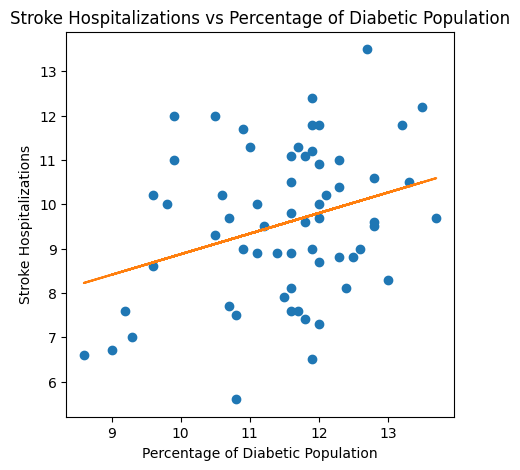

In [61]:
#To Plot Value of Stroke Hospitalization vs Percentage of diabetic population
#The ultimate goal is to generate constant 'm' and 'c', this will be later plugged into linear equation to make predictions.


e= df["Value_of_Stroke_Hospitalization"]
f = df["Diabetes_Percentage"]

#To store the columns above as an array[list] datatype.
x= np.array(e)
y= np.array(f)

plt.figure(figsize=(5,5))
#The following code shows how to create a scatter plot with an estimated regression line for our dataset based on least square values.
plt.plot(x, y, 'o')
m1, c1 = np.polyfit(x, y, 1)

plt.plot(x, m1*x + c1)
plt.title("Stroke Hospitalizations vs Percentage of Diabetic Population")
plt.xlabel('Percentage of Diabetic Population')
plt.ylabel('Stroke Hospitalizations')
print(m1)
print(c1)
plt.savefig('Stroke Hospitalizations vs Percentage of Diabetic Population.png')
plt.show()

In [62]:
#A simple linear regression model with just one covariate, "Diabetic Population Percentage", predicting "Stroke Hospitalizations".
#The fitted model implies that when comparing two populations whose "Diabetic percentage" differ by one unit, the population with the higher "Diabetic Percentage" will on average, have 0.20 units higher "Stroke Hospitalizations".
#This difference is statistically significant because the p-value shown as p>/t/ is less than the significance value of 0.05.
#This means that there is a strong evidence of a linear association between the variables "Diabetic Population Percentage" and "Stroke Hospitalizations"
#The other parameter to test the efficacy of this model is the R-squared value which represents the percentage variation in the dependent variable (Stroke Hospitalizations) that is...
#...explained by the independent variable (Diabetic Population Percentage). The higher the value, the better the explainability of this model with the highest value being 1.
#In this case, The R-squared value of 0.094 means that 9.4% of the variation in the variable "Stroke Hospitalization" is explained by the variable "Diabetic Population Percentage"
model_lin=sm.OLS.from_formula ("Value_of_Stroke_Hospitalization ~ Diabetes_Percentage", data=df)
result_lin=model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Value_of_Stroke_Hospitalization   R-squared:                       0.094
Model:                                         OLS   Adj. R-squared:                  0.079
Method:                              Least Squares   F-statistic:                     6.254
Date:                             Sun, 21 May 2023   Prob (F-statistic):             0.0151
Time:                                     17:57:33   Log-Likelihood:                -92.104
No. Observations:                               62   AIC:                             188.2
Df Residuals:                                   60   BIC:                             192.5
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.5497      0.791     12.078      0.000       7.968      11.131
Diabetes_Percentage     0.2035      0.081      2.501      0.015       0.041       0.366
==============================================================================
Omnibus:                        2.710   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.555
Skew:                          -0.427   Prob(JB):                        0.279
Kurtosis:                       2.489   Cond. No.                         56.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#The pearson correlation coefficient is also an indicator of the extent and strength of the linear relationship between the two variables
#The lines of code below calculate and print the correlation coefficient, which in this case comes out to be 0.31.
#Statistically this is not a strong positive correlation, but it tells us there is correlation to some extent; the highest value is 1
cc= df[['Value_of_Stroke_Hospitalization', 'Diabetes_Percentage']].corr()
print(cc)

                                 Value_of_Stroke_Hospitalization   
Value_of_Stroke_Hospitalization                         1.000000  \
Diabetes_Percentage                                     0.307243   

                                 Diabetes_Percentage  
Value_of_Stroke_Hospitalization             0.307243  
Diabetes_Percentage                         1.000000  


1.2115390960079186
17.500240844605734


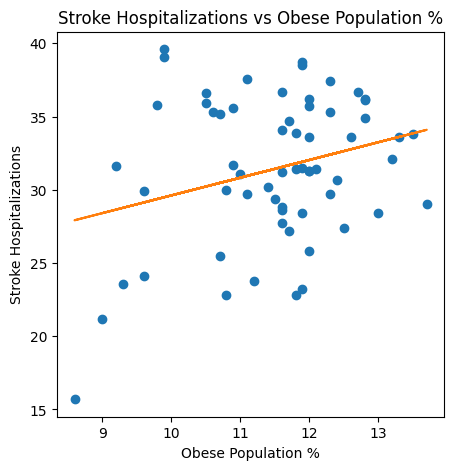

In [64]:
#To Plot Value of Stroke Hospitalization vs Percentage of Obese population
g = df["Value_of_Stroke_Hospitalization"]
h = df["Obesity_Percentage"]

x= np.array(g)
y= np.array(h)

plt.figure(figsize=(5,5))
#The following code shows how to create a scatter plot with an estimated regression line for our dataset based on least square values.
plt.plot(x, y, 'o')
m2, c2 = np.polyfit(x, y, 1)

plt.plot(x, m2*x + c2)
plt.title("Stroke Hospitalizations vs Obese Population %")
plt.xlabel('Obese Population %')
plt.ylabel('Stroke Hospitalizations')
print(m2)
print(c2)
plt.savefig('Stroke Hospitalizations vs Obese Population %')
plt.show()


In [65]:
model_lin=sm.OLS.from_formula ("Value_of_Stroke_Hospitalization ~ Obesity_Percentage", data=df)
result_lin=model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Value_of_Stroke_Hospitalization   R-squared:                       0.075
Model:                                         OLS   Adj. R-squared:                  0.059
Method:                              Least Squares   F-statistic:                     4.835
Date:                             Sun, 21 May 2023   Prob (F-statistic):             0.0318
Time:                                     17:57:34   Log-Likelihood:                -92.776
No. Observations:                               62   AIC:                             189.6
Df Residuals:                                   60   BIC:                             193.8
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.5624      0.891     10.735      0.000       7.781      11.344
Obesity_Percentage     0.0615      0.028      2.199      0.032       0.006       0.118
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.885
Skew:                          -0.370   Prob(JB):                        0.390
Kurtosis:                       2.575   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
cc1= df[['Value_of_Stroke_Hospitalization', 'Obesity_Percentage']].corr()
print(cc1)

                                 Value_of_Stroke_Hospitalization   
Value_of_Stroke_Hospitalization                         1.000000  \
Obesity_Percentage                                      0.273071   

                                 Obesity_Percentage  
Value_of_Stroke_Hospitalization            0.273071  
Obesity_Percentage                         1.000000  


1.130468492246785
6.025839656878903


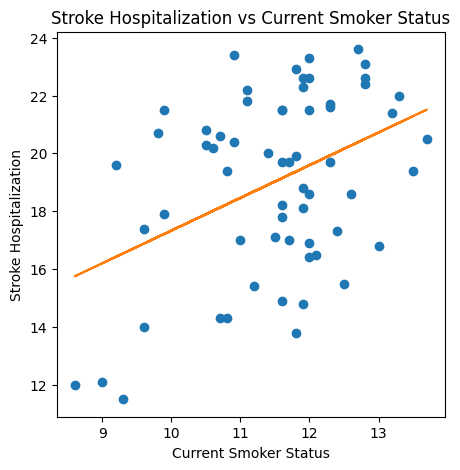

In [67]:
#To Plot Value of Stroke Hospitalization vs Current Smoker Status
i = df["Value_of_Stroke_Hospitalization"]
j = df["Current_Smoker_Status"]

x= np.array(i)
y= np.array(j)

plt.figure(figsize=(5,5))
#The following code shows how to create a scatter plot with an estimated regression line for our dataset based on least square values.
plt.plot(x, y, 'o')
m3, c3 = np.polyfit(x, y, 1)

plt.plot(x, m3*x + c3)
plt.title("Stroke Hospitalization vs Current Smoker Status")
plt.xlabel('Current Smoker Status')
plt.ylabel('Stroke Hospitalization')
print(m3)
print(c3)
plt.savefig('Stroke Hospitalization vs Current Smoker Status')
plt.show()


In [68]:
model_lin=sm.OLS.from_formula ("Value_of_Stroke_Hospitalization ~ Current_Smoker_Status", data=df)
result_lin=model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Value_of_Stroke_Hospitalization   R-squared:                       0.168
Model:                                         OLS   Adj. R-squared:                  0.154
Method:                              Least Squares   F-statistic:                     12.07
Date:                             Sun, 21 May 2023   Prob (F-statistic):           0.000956
Time:                                     17:57:34   Log-Likelihood:                -89.495
No. Observations:                               62   AIC:                             183.0
Df Residuals:                                   60   BIC:                             187.2
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.6780      0.822     10.558      0.000       7.034      10.322
Current_Smoker_Status     0.1482      0.043      3.475      0.001       0.063       0.233
==============================================================================
Omnibus:                        1.662   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.537
Skew:                          -0.269   Prob(JB):                        0.464
Kurtosis:                       2.447   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
cc2= df[['Value_of_Stroke_Hospitalization', 'Current_Smoker_Status']].corr()
print(cc2)

                                 Value_of_Stroke_Hospitalization   
Value_of_Stroke_Hospitalization                         1.000000  \
Current_Smoker_Status                                   0.409286   

                                 Current_Smoker_Status  
Value_of_Stroke_Hospitalization               0.409286  
Current_Smoker_Status                         1.000000  


8.157126360937038
628.8951666116787


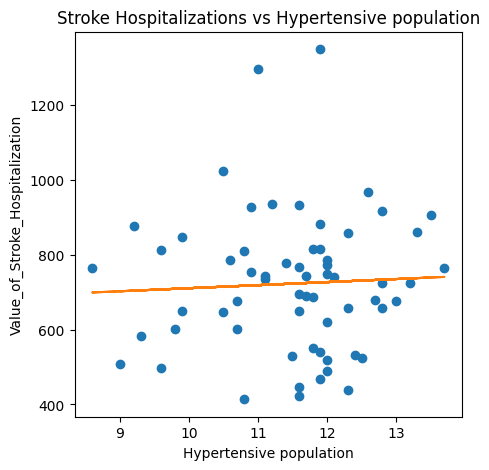

In [70]:
#To Plot Value of Stroke Hospitalization vs Hypertension Values
k = df["Value_of_Stroke_Hospitalization"]
l = df["Value_of_Hypertension"]

x= np.array(k)
y= np.array(l)

plt.figure(figsize=(5,5))
#The following code shows how to create a scatter plot with an estimated regression line for our dataset.
plt.plot(x, y, 'o')
m4, c4 = np.polyfit(x, y, 1)

plt.plot(x, m4*x + c4)
plt.title("Stroke Hospitalizations vs Hypertensive population")
plt.xlabel('Hypertensive population')
plt.ylabel('Value_of_Stroke_Hospitalization')
print(m4)
print(c4)
plt.show()

In [71]:
model_lin=sm.OLS.from_formula ("Value_of_Stroke_Hospitalization ~ Value_of_Hypertension", data=df)
result_lin=model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Value_of_Stroke_Hospitalization   R-squared:                       0.002
Model:                                         OLS   Adj. R-squared:                 -0.014
Method:                              Least Squares   F-statistic:                    0.1494
Date:                             Sun, 21 May 2023   Prob (F-statistic):              0.700
Time:                                     17:57:34   Log-Likelihood:                -95.101
No. Observations:                               62   AIC:                             194.2
Df Residuals:                                   60   BIC:                             198.5
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.2767      0.587     19.195      0.000      10.102      12.452
Value_of_Hypertension     0.0003      0.001      0.387      0.700      -0.001       0.002
==============================================================================
Omnibus:                        3.306   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.999
Skew:                          -0.537   Prob(JB):                        0.223
Kurtosis:                       2.908   Cond. No.                     3.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
cc3= df[['Value_of_Stroke_Hospitalization', 'Value_of_Hypertension']].corr()
print(cc3)

                                 Value_of_Stroke_Hospitalization   
Value_of_Stroke_Hospitalization                         1.000000  \
Value_of_Hypertension                                   0.049841   

                                 Value_of_Hypertension  
Value_of_Stroke_Hospitalization               0.049841  
Value_of_Hypertension                         1.000000  


#### 'Value of Stroke Hospitalization' vs 'Value of Hypertension' gives us a very low pearson correlation coefficient, with very low R-squared value and a P>|t| value of 0.7, hence there is no correlation between the dependent and the independent variable. That could also translate to null hypothesis.

0.22542477730122093
3.5212454635433823


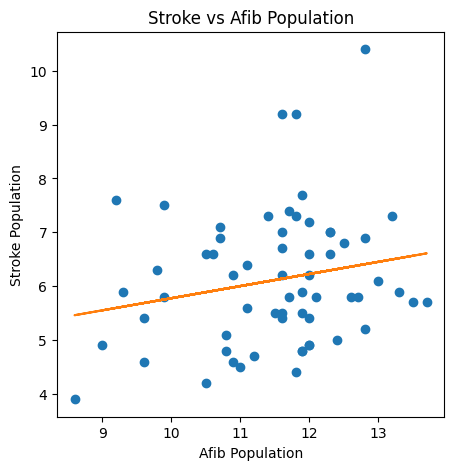

In [73]:
#To Plot Stroke vs Afib Hospitalization
m = df["Value_of_Stroke_Hospitalization"]
n = df["Value_of_Afib_Hospitalization"]

x= np.array(m)
y= np.array(n)

plt.figure(figsize=(5,5))
#The following code shows how to create a scatter plot with an estimated regression line for our dataset.
plt.plot(x, y, 'o')
m5, c5 = np.polyfit(x, y, 1)

plt.plot(x, m5*x + c5)
plt.title("Stroke vs Afib Population")
plt.xlabel('Afib Population')
plt.ylabel('Stroke Population')
print(m5)
print(c5)
plt.show()

In [74]:
model_lin=sm.OLS.from_formula ("Value_of_Stroke_Hospitalization ~ Value_of_Afib_Hospitalization", data=df)
result_lin=model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Value_of_Stroke_Hospitalization   R-squared:                       0.042
Model:                                         OLS   Adj. R-squared:                  0.026
Method:                              Least Squares   F-statistic:                     2.624
Date:                             Sun, 21 May 2023   Prob (F-statistic):              0.111
Time:                                     17:57:35   Log-Likelihood:                -93.851
No. Observations:                               62   AIC:                             191.7
Df Residuals:                                   60   BIC:                             196.0
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        10.3606      0.716     14.478      0.000       8.929      11.792
Value_of_Afib_Hospitalization     0.1859      0.115      1.620      0.111      -0.044       0.415
==============================================================================
Omnibus:                        2.293   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                2.058
Skew:                          -0.442   Prob(JB):                        0.357
Kurtosis:                       2.873   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
cc3= df[['Value_of_Stroke_Hospitalization', 'Value_of_Afib_Hospitalization']].corr()
print(cc3)

                                 Value_of_Stroke_Hospitalization   
Value_of_Stroke_Hospitalization                         1.000000  \
Value_of_Afib_Hospitalization                           0.204689   

                                 Value_of_Afib_Hospitalization  
Value_of_Stroke_Hospitalization                       0.204689  
Value_of_Afib_Hospitalization                         1.000000  


#### 'Value of Stroke Hospitalization' vs 'Value_of_Afib_Hospitalization' gives us a low pearson correlation coefficient, with very low R-squared value and a P>|t| value of 0.111, hence there may be no correlation between the dependent and the independent variable. That could also translate to null hypothesis.

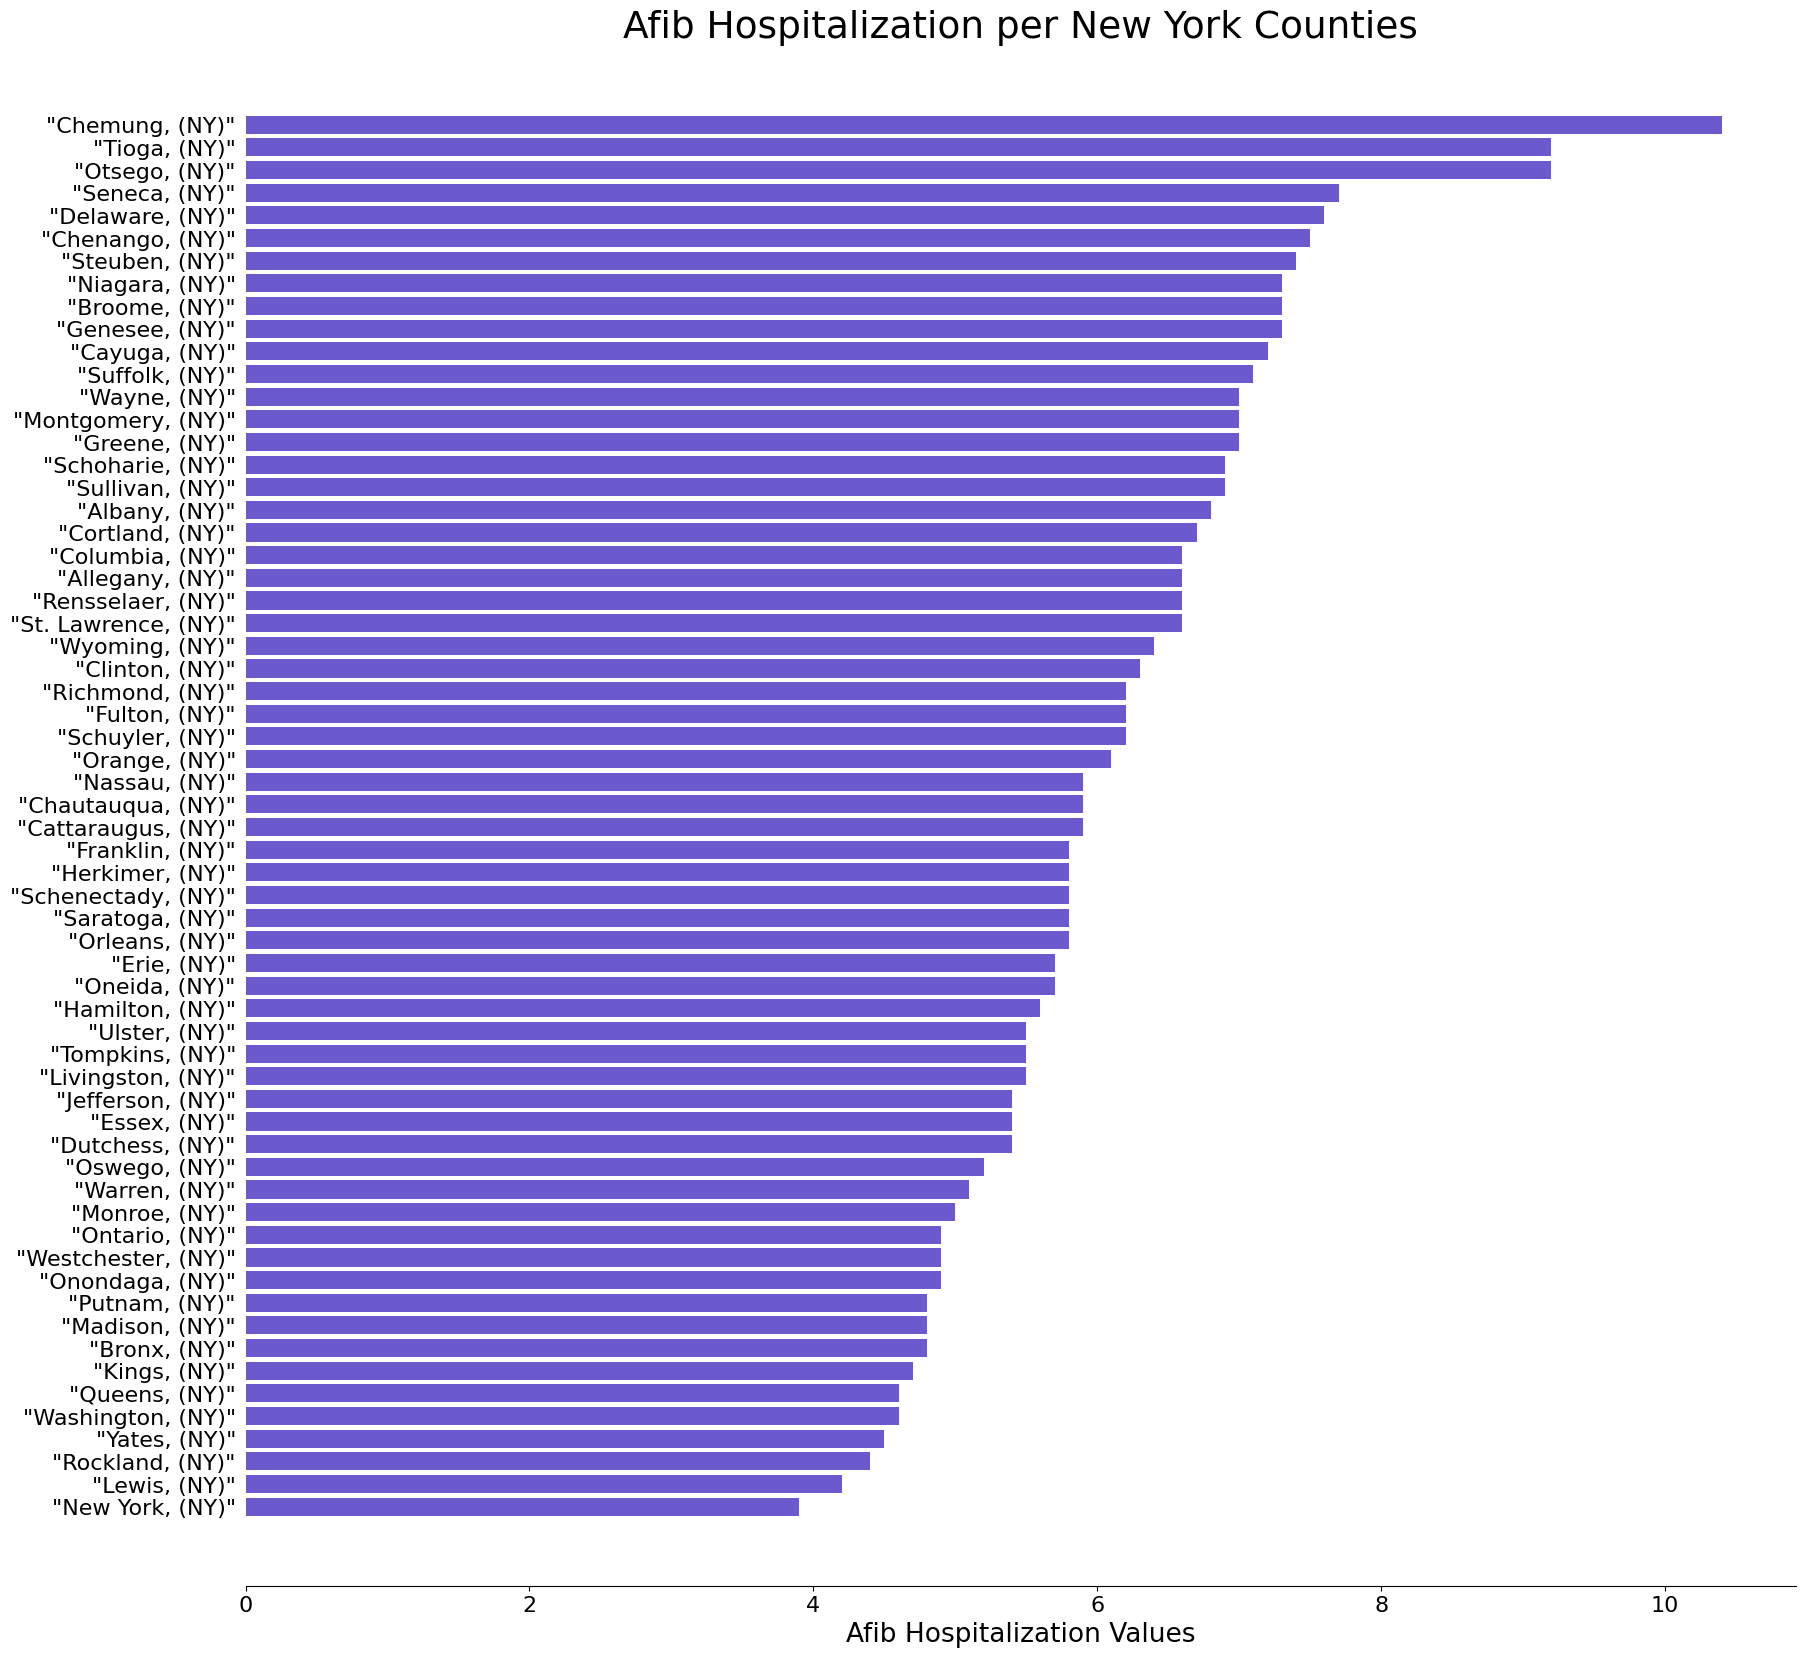

In [76]:
#To Plot a bar chart showing how Afib Patients are distributed amongst New York counties.
#Chemung has the highest Afib hospitalizations, New york has the least.
l = df["Value_of_Afib_Hospitalization"]
k = df["Name"]


plt.figure(figsize=(20,20))
df_sorted = df.sort_values('Value_of_Afib_Hospitalization')
plt.barh('Name', 'Value_of_Afib_Hospitalization', data=df_sorted, color='slateblue')

plt.title('Afib Hospitalization per New York Counties', fontsize=27)
plt.xlabel('Afib Hospitalization Values', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.savefig('Afib Hospitalization per New York Counties')
plt.show()


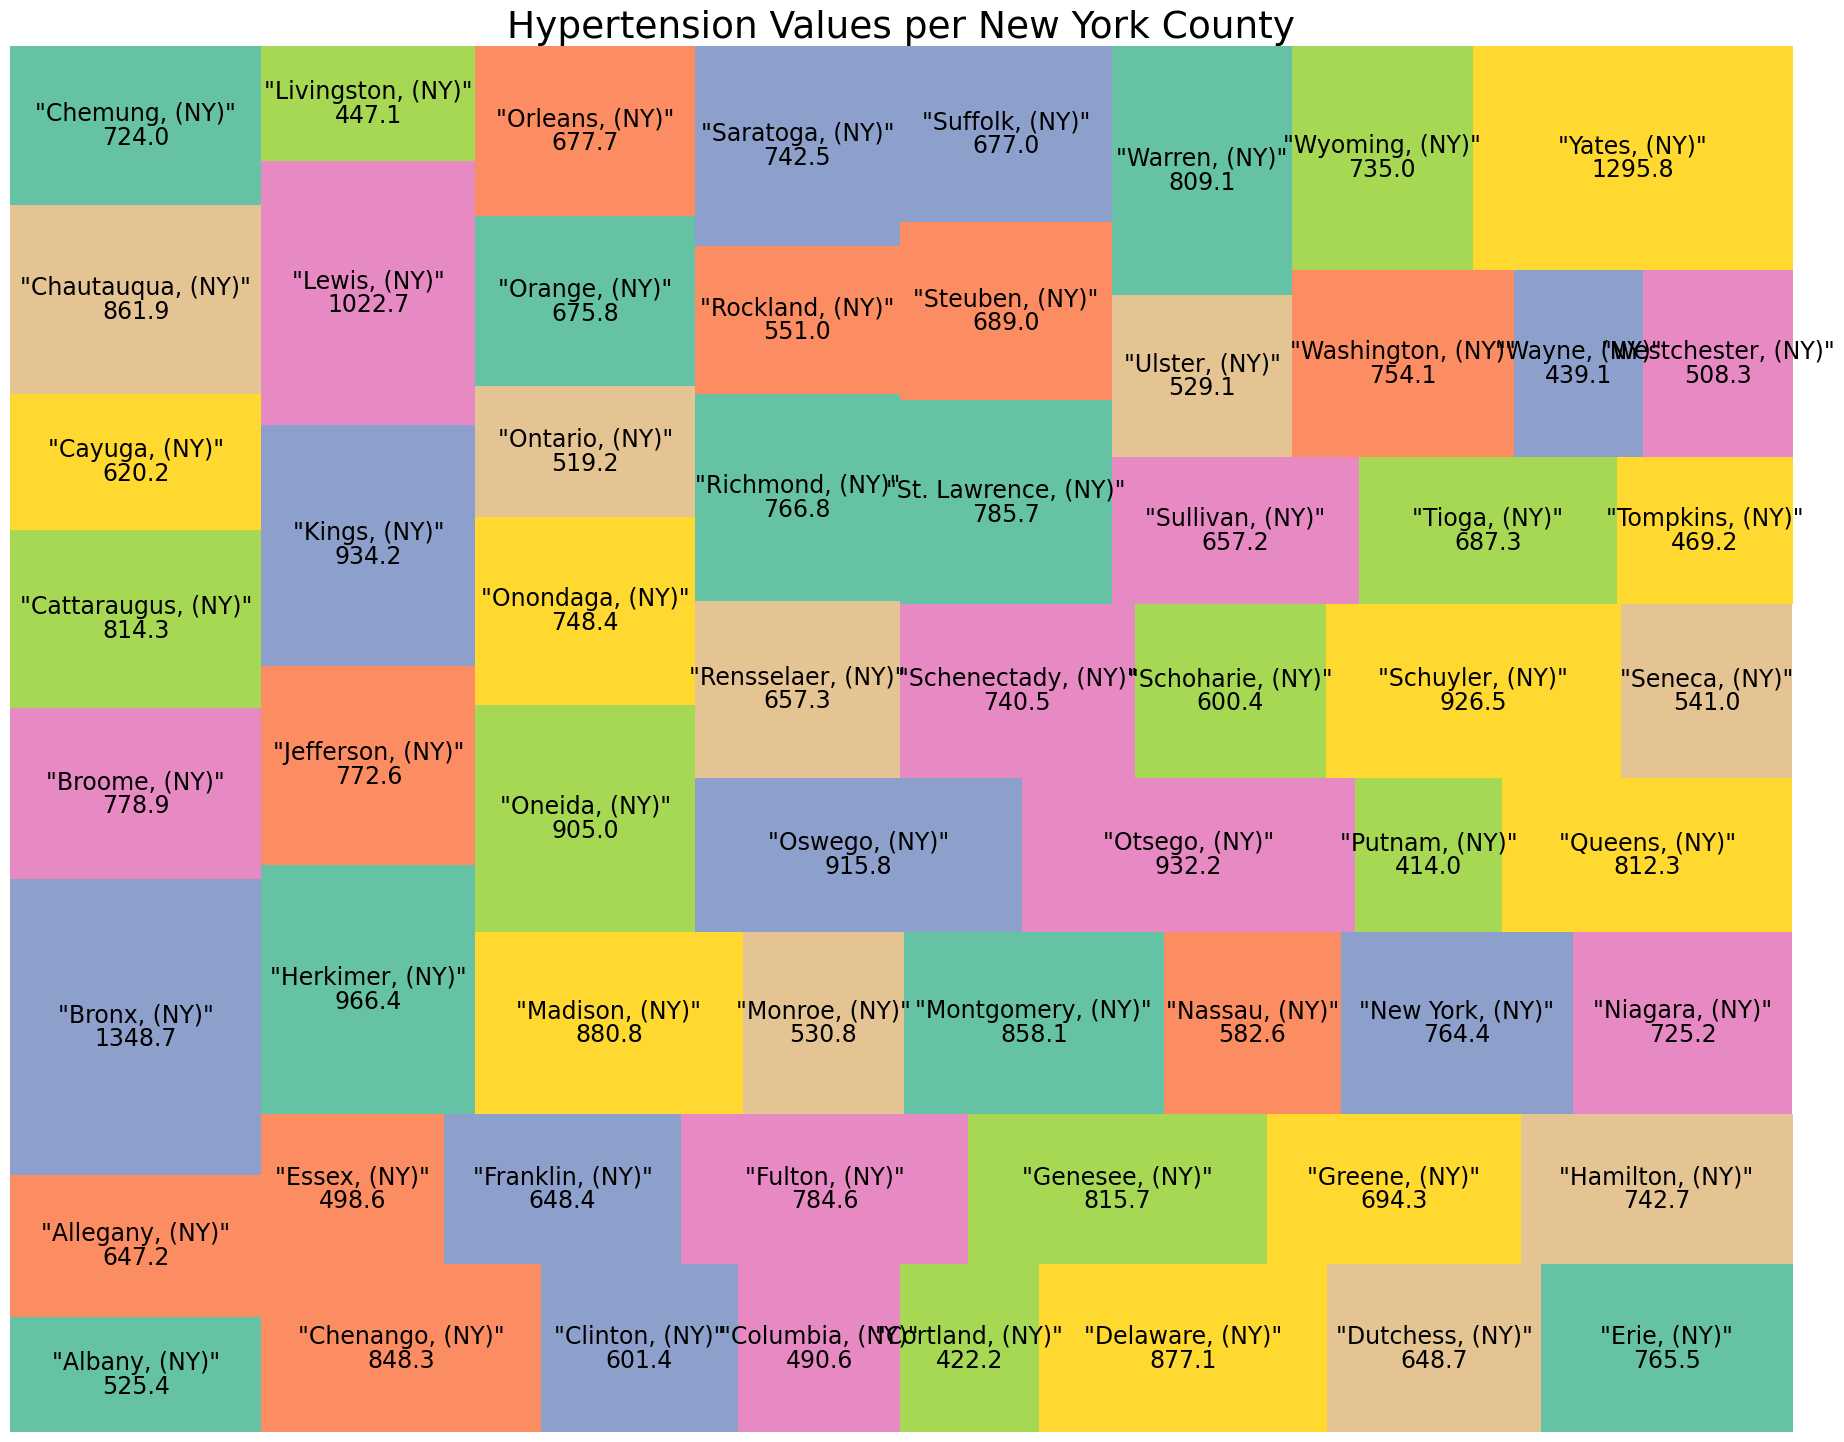

In [77]:
#Squarify image showing distribution of hypertensive patients amongst New Yorkers.

plt.figure(figsize=(23,18))
l = df["Value_of_Hypertension"]
k = df["Name"]
x= np.array(l)
y= np.array(k)
squarify.plot(sizes=x, label=y, value=x,
              color=[matplotlib.cm.Set2(i) for i in range(7)],
              text_kwargs={'fontsize': 17})
plt.title('Hypertension Values per New York County', fontsize=27)
plt.axis('off')
plt.savefig('Hypertension Values per New York County')
plt.show()


### An application to predict how three independent variables: Obesity, Smoking Status and Diabetes predict Stroke morbidities in New York

In [9]:
window = Tk()
window.title('project')

# adjust size
#window.geometry ("400,300")

# set minimum window size
window.minsize (600,300)

# set maximum window size
window.maxsize (600,300)

#To load image for team4
#prj_img= ImageTk.PhotoImage(PIL.Image.open('5.jpg'))
#prj_label = Label(image=prj_img)
#prj_label.pack()



#To display school name
sch_name=Label(window,text='SUNY DOWNSTATE MEDICAL CENTER', fg='blue', font=('Impact', 40))
sch_name.pack()

#To display school address
add1_name=Label(window,text='451 Clarkson Avenue', fg='blue', font=('Calibri', 14))
add1_name.pack()

#To display school address
add2_name=Label(window,text='Brooklyn, NY, USA', fg='blue', font=('Calibri', 12))
add2_name.pack()

#To display program name
info_name=Label(window,text='STROKE PREDICTOR', fg='black', font=('Calibri', 28))
info_name.pack()

#To display instruction
label3=Label(window, text='Choose a dimension/disease in the drop-down list below', fg='black', font =('calibri', 12))
label3.pack()

#To display a dropdown list containing independent risk factors
clicked=StringVar()
drop=OptionMenu(window,clicked, 'Obesity', 'Diabetes', 'Current Smoke Status')
drop.pack()

#To display instruction
label1=Label(window,text='Enter value:', fg='blue', font=('Arial', 12))
label1.pack()

#To specify the datatype acceptable for our program.
value= IntVar()

#To display a textbox to accept values for the calculation.
textbox1=Entry(window, textvariable=value, fg='blue', font=('Arial', 8))
textbox1.set=""
textbox1.pack()

#To create a function to calculate Stroke Hospitalizations based on constants - 'M', 'C' and value of 'x' entered by the user
def project():
    
    #To make sure the pop-up warning window comes up across all dropdown choices
    global pop
    
    #To try the program incase the user inputs a datatype different from the one specified
    try:
        if clicked.get()=='Obesity':        
            if value.get()<=0:            
            #global pop
                pop = Toplevel(window)
                pop.title("Warning")
                pop.geometry("200x40")
                pop_label=Label(pop, text="enter a value greater than 1")
                pop_label.pack()
            else:            
                y=m1*value.get() + c1
                #To round outcome to 2 decimal places
                z=round(y, 2)
                label2.config(text='at ' + str(value.get()) + '% ' + str(clicked.get()) +  ' percentage amongst newyorkers, ' + 'we can conclude ' + str(z) + '% will develop stroke')
                
                
        elif clicked.get()=='Diabetes':
            if value.get()<=0:            
            #global pop
                pop = Toplevel(window)
                pop.title("Warning")
                pop.geometry("200x40")
                pop_label=Label(pop, text="enter a value greater than 1")
                pop_label.pack()
            else:
                y=m2*value.get() + c2
                #To round outcome to 2 decimal places
                z=round(y, 2)
                label2.config(text='at ' + str(value.get()) + '% ' + str(clicked.get()) +  ' percentage amongst newyorkers, ' + 'we can conclude ' + str(z) + '% will develop stroke')    
        elif clicked.get()=='Current Smoke Status':
            if value.get()<=0:            
            #global pop
                pop = Toplevel(window)
                pop.title("Warning")
                pop.geometry("200x40")
                pop_label=Label(pop, text="enter a value greater than 1")
                pop_label.pack()
            else:
                y=m3*value.get() + c3
                #To round outcome to 2 decimal places
                z=round(y, 2)
                label2.config(text='at ' + str(value.get()) + '% ' + str(clicked.get()) +  '  amongst newyorkers, ' + 'we can conclude ' + str(z) + '% will develop stroke')    
        else:
            label2.config(text='Choose an observation!')
            
    #This window pops-up if the try exception is triggered
    except:
        pop2 = Toplevel(window)
        pop2.title("Error")
        pop2.geometry("200x40")
        pop2_label=Label(pop2, text="ensure to enter a number value!")
        pop2_label.pack()
        
#Button to call the function above
button1 = Button(window, command=project, text = 'Predict ' + str(clicked.get()), fg='blue', font=('Arial', 14))
button1.pack()

#serves as container to display the result
label2=Label(window, fg='green', font=('Arial', 14))
label2.pack()


#Command to quit the window
#def close():
    #window.destroy()
    
#quit_button=Button(window, command=close, text="Exit Calculator" )
#quit_button.pack()

window.mainloop()

: 

: 